In [1]:
#read raw data from dataset
raw <- read.csv("property-tax-report-2016-2019.csv", header=TRUE, sep = ";", stringsAsFactors=TRUE)

In [2]:
#load library

#util
# install.packages("dplyr") #for sample_n
library(dplyr) 
# install.packages("car") #for scatterplot, avPlot, crPlots, vif
library(car) 
# install.packages("psych") #for pairs.panels
library(psych)

#model selection
# install.packages("leaps") #for regsubsets
library(leaps)
# install.packages("MASS") #for stepAIC
library(MASS)
# install.packages("caret") #for stepAIC
library(caret)





# library(tidyverse)
# library(caret)

# install.packages("GGally")
# library(GGally)
# install.packages("ggfortify")
# library(ggfortify)
# library(scatterplot3d) #for scatterplot3d

#define environment variable
options(digits=8)
options(scipen=10)
options(repr.plot.width=4*3, repr.plot.height=3*3)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: lattice



In [3]:
#filter out data which has ZONING_CLASSIFICATION == "one family dwelling"remove 
raw_processing <- raw[raw$ZONING_CLASSIFICATION == "One-Family Dwelling",]
raw_processing <- subset(raw_processing, select = -c(ZONING_CLASSIFICATION))

#remove NA rows
raw_processing <- na.omit(raw_processing)

#merge land value and imporvement value
raw_processing$PREVIOUS_PRICE <- raw_processing$PREVIOUS_LAND_VALUE + raw_processing$PREVIOUS_IMPROVEMENT_VALUE
raw_processing$PRICE <- raw_processing$CURRENT_LAND_VALUE + raw_processing$CURRENT_IMPROVEMENT_VALUE
raw_processing <- subset(raw_processing, select = -c(CURRENT_IMPROVEMENT_VALUE,CURRENT_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE))

#make factor
raw_processing$LEGAL_TYPE <- as.factor(raw_processing$LEGAL_TYPE)
raw_processing$TAX_ASSESSMENT_YEAR <- as.factor(raw_processing$TAX_ASSESSMENT_YEAR)

#backup a result for outlier search
raw_outliers_potential <- raw_processing

#remove unrelated and duplicated information
#remove geo location information due to complexity
raw_processing <- subset(raw_processing, select = -c(PID,LAND_COORDINATE,PROPERTY_POSTAL_CODE,STREET_NAME,LOT,NEIGHBOURHOOD_CODE,REPORT_YEAR,PLAN,DISTRICT_LOT,BLOCK,ZONING_DISTRICT,FOLIO,NARRATIVE_LEGAL_LINE1,TO_CIVIC_NUMBER,FROM_CIVIC_NUMBER,NARRATIVE_LEGAL_LINE2,NARRATIVE_LEGAL_LINE3,NARRATIVE_LEGAL_LINE4,NARRATIVE_LEGAL_LINE5))

#sample data and save to local file system
N <- as.integer(nrow(raw_processing))
cat("sample size: ", N, "\n")

# data <- sample_n(as.data.frame(raw_processing), N)
data <- raw_processing

Name <- paste("Sample_Size_", N, "_", format(Sys.time(), '%Y_%m_%d_%H_%M_%S'), ".csv", sep="")
write.csv(data, Name, row.names = FALSE)

cat("QUALITATIVE:  'LEGAL_TYPE''TAX_ASSESSMENT_YEAR'\n")
cat("QUANTITATIVE: 'YEAR_BUILT''BIG_IMPROVEMENT_YEAR''TAX_LEVY''PREVIOUS_PRICE''PRICE'")

#reload data------------------------------------
data <- read.csv(Name,header=TRUE,stringsAsFactors=TRUE)
data$LEGAL_TYPE <- as.factor(data$LEGAL_TYPE)
data$TAX_ASSESSMENT_YEAR <- as.factor(data$TAX_ASSESSMENT_YEAR)

sample size:  270029 
QUALITATIVE:  'LEGAL_TYPE''TAX_ASSESSMENT_YEAR'
QUANTITATIVE: 'YEAR_BUILT''BIG_IMPROVEMENT_YEAR''TAX_LEVY''PREVIOUS_PRICE''PRICE'

[1] "LEGAL_TYPE"                "TAX_ASSESSMENT_YEAR"      
[3] "YEAR_BUILT"                "BIG_IMPROVEMENT_YEAR"     
[5] "TAX_LEVY"                  "PREVIOUS_PRICE"           
[7] "PRICE"                     "reg1StandardizedResiduals"
[9] "reg2StandardizedResiduals"

 LEGAL_TYPE     TAX_ASSESSMENT_YEAR   YEAR_BUILT     BIG_IMPROVEMENT_YEAR
 FALSE:269984   2016:67373          Min.   :1900.0   Min.   :1905        
 TRUE :    17   2017:67295          1st Qu.:1942.0   1st Qu.:1965        
                2018:67571          Median :1969.0   Median :1980        
                2019:67762          Mean   :1967.1   Mean   :1980        
                                    3rd Qu.:1993.0   3rd Qu.:1995        
                                    Max.   :2019.0   Max.   :2019        
    TAX_LEVY         PREVIOUS_PRICE          PRICE          
 Min.   :      0.0   Min.   :        2   Min.   :        2  
 1st Qu.:   5049.6   1st Qu.:  1274000   1st Qu.:  1422600  
 Median :   5989.0   Median :  1669000   Median :  1802000  
 Mean   :   7637.1   Mean   :  2279090   Mean   :  2478716  
 3rd Qu.:   8769.7   3rd Qu.:  2622000   3rd Qu.:  2866700  
 Max.   :1211119.0   Max.   :410985000   Max.   :435173000  
 reg1StandardizedResiduals reg2StandardizedResiduals
 M

[1] "2022-08-09 03:21:01 UTC"
[1] "2022-08-09 03:22:17 UTC"


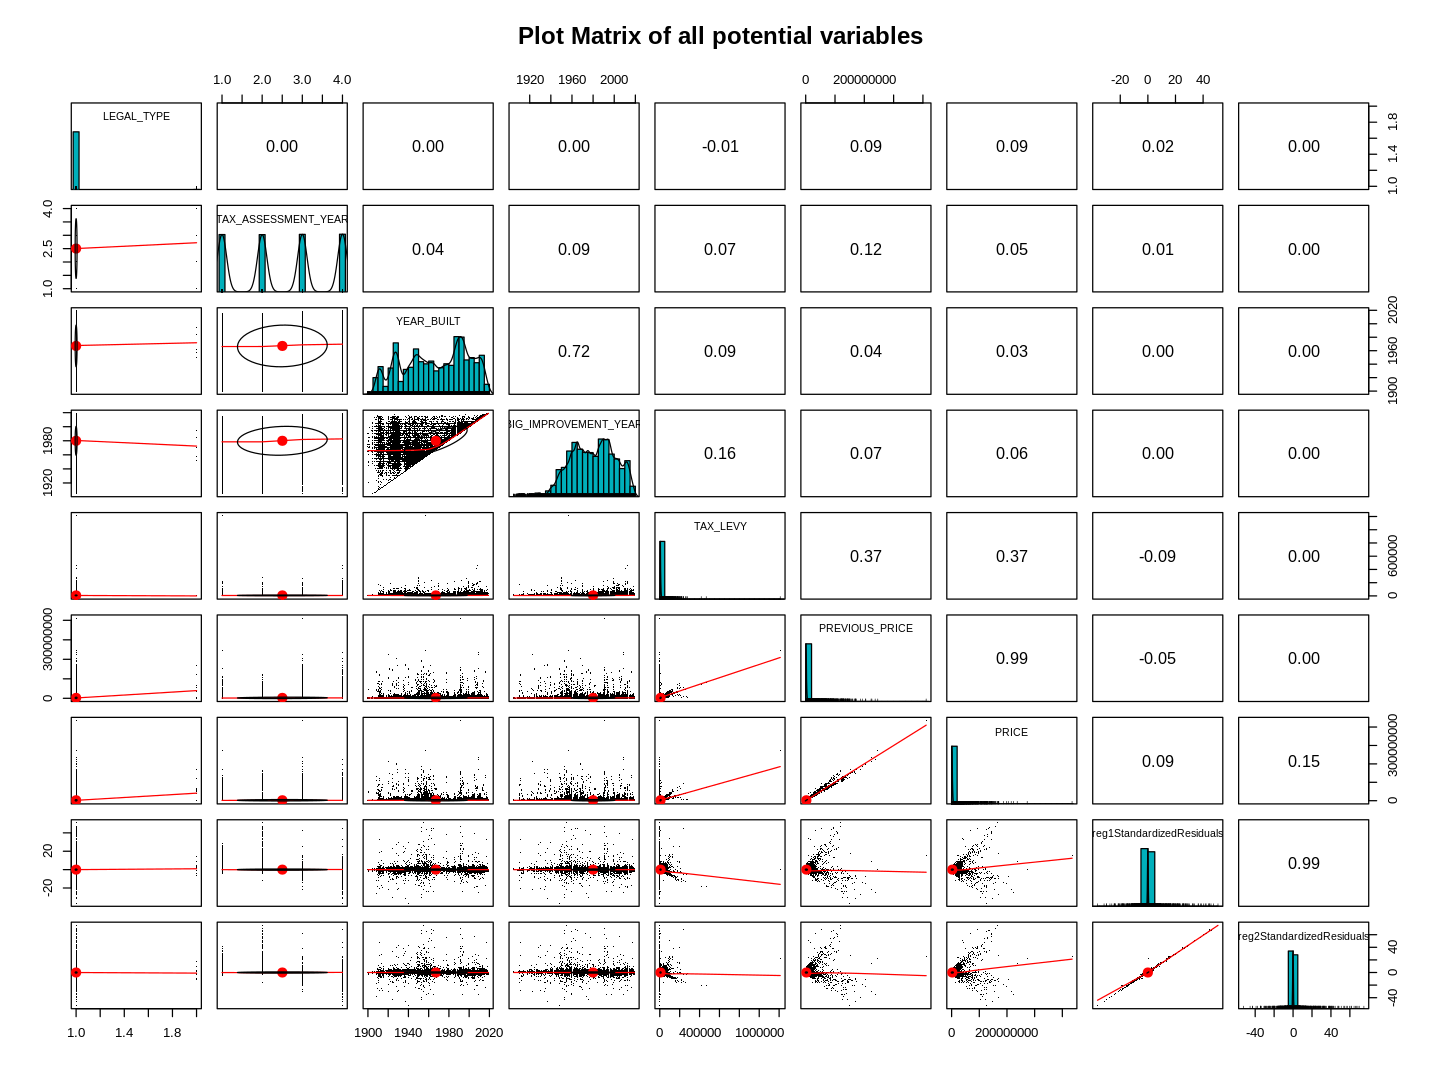

In [15]:
#display data
names(data)
summary(data)
print(Sys.time())
pairs.panels(data, 
             main="Plot Matrix of all potential variables",
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE, # show correlation ellipses
             pch='.')
print(Sys.time())

In [5]:
cat("Detect Collinear by fittin a basic regression\n")
print(Sys.time())
reg <- lm(PRICE~LEGAL_TYPE+YEAR_BUILT+BIG_IMPROVEMENT_YEAR+PREVIOUS_PRICE+TAX_LEVY+TAX_ASSESSMENT_YEAR, data = data)
vif(reg,type="predictor")
print(Sys.time())

Detect Collinear by fittin a basic regression
[1] "2022-08-08 06:44:17 UTC"


GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LEGAL_TYPE,1.0437091,2,1.0107526,--,"YEAR_BUILT, BIG_IMPROVEMENT_YEAR, PREVIOUS_PRICE, TAX_LEVY, TAX_ASSESSMENT_YEAR"
YEAR_BUILT,2.1100937,1,1.4526161,--,"LEGAL_TYPE, BIG_IMPROVEMENT_YEAR, PREVIOUS_PRICE, TAX_LEVY, TAX_ASSESSMENT_YEAR"
BIG_IMPROVEMENT_YEAR,2.1540191,1,1.4676577,--,"LEGAL_TYPE, YEAR_BUILT, PREVIOUS_PRICE, TAX_LEVY, TAX_ASSESSMENT_YEAR"
PREVIOUS_PRICE,1.2231207,1,1.1059479,--,"LEGAL_TYPE, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY, TAX_ASSESSMENT_YEAR"
TAX_LEVY,1.2019588,1,1.0963388,--,"LEGAL_TYPE, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, PREVIOUS_PRICE, TAX_ASSESSMENT_YEAR"
TAX_ASSESSMENT_YEAR,1.0249602,3,1.0041174,--,"LEGAL_TYPE, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, PREVIOUS_PRICE, TAX_LEVY"


[1] "2022-08-08 06:44:17 UTC"


In [6]:
#see http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/154-stepwise-regression-essentials-in-r/
train.control <- trainControl(method = "cv", number = 10)
# Train the model
step.model <- train(PRICE ~., data = data,
                    method = "leapSeq", 
                    tuneGrid = data.frame(nvmax = 1:8),
                    trControl = train.control
                    )
step.model$results
# nvmax: the number of variable in the model. For example nvmax = 2, specify the best 2-variables model
# RMSE and MAE are two different metrics measuring the prediction error of each model. The lower the RMSE and MAE, the better the model.
# Rsquared indicates the correlation between the observed outcome values and the values predicted by the model. The higher the R squared, the better the model.
step.model$bestTune #best model number
summary(step.model$finalModel) #best model

,nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,873180.56,0.967335981,337464.62,218953.78,0.015229662,6690.6774
2,2,826161.69,0.970877872,266237.33,227891.33,0.015256007,5040.2441
3,3,804008.90,0.972543931,223159.37,235220.01,0.015525202,5720.0828
4,4,2734438.25,0.501194785,725218.93,2059598.65,0.497314802,526947.1732
5,5,2682659.36,0.501626269,709701.12,2010243.10,0.497453139,528378.3257
6,6,4619133.38,0.031428403,1213665.81,283484.55,0.024313501,18088.0454
7,7,795860.73,0.972693572,206875.81,242723.47,0.016072415,4905.1104
8,8,795781.37,0.972698040,207033.56,242736.14,0.016072913,4884.6865


,nvmax
,<int>
8,8


Subset selection object
9 Variables  (and intercept)
                        Forced in Forced out
LEGAL_TYPEOTHER             FALSE      FALSE
LEGAL_TYPESTRATA            FALSE      FALSE
TAX_ASSESSMENT_YEAR2017     FALSE      FALSE
TAX_ASSESSMENT_YEAR2018     FALSE      FALSE
TAX_ASSESSMENT_YEAR2019     FALSE      FALSE
YEAR_BUILT                  FALSE      FALSE
BIG_IMPROVEMENT_YEAR        FALSE      FALSE
TAX_LEVY                    FALSE      FALSE
PREVIOUS_PRICE              FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: 'sequential replacement'
         LEGAL_TYPEOTHER LEGAL_TYPESTRATA TAX_ASSESSMENT_YEAR2017
1  ( 1 ) " "             " "              " "                    
2  ( 1 ) " "             " "              "*"                    
3  ( 1 ) " "             " "              " "                    
4  ( 1 ) "*"             "*"              "*"                    
5  ( 1 ) " "             " "              "*"                    
6  ( 1 ) "*"            

In [7]:
# Convert LEGAL_TYPE to TF for dummy variable
cat("Convert LEGAL_TYPE to TF for dummy variable\n")
data$LEGAL_TYPE <- as.character(data$LEGAL_TYPE)
data[data$LEGAL_TYPE == "OTHER",1] <- "TRUE"
data[data$LEGAL_TYPE == "LAND",1] <- "FALSE"
data[data$LEGAL_TYPE == "STRATA",1] <- "FALSE"
data$LEGAL_TYPE <- as.factor(data$LEGAL_TYPE)  
summary(data)

Convert LEGAL_TYPE to TF for dummy variable


 LEGAL_TYPE     TAX_ASSESSMENT_YEAR   YEAR_BUILT     BIG_IMPROVEMENT_YEAR
 FALSE:270003   2016:67378          Min.   :1900.0   Min.   :1905        
 TRUE :    26   2017:67306          1st Qu.:1942.0   1st Qu.:1965        
                2018:67575          Median :1969.0   Median :1980        
                2019:67770          Mean   :1967.1   Mean   :1980        
                                    3rd Qu.:1993.0   3rd Qu.:1995        
                                    Max.   :2019.0   Max.   :2019        
    TAX_LEVY         PREVIOUS_PRICE          PRICE          
 Min.   :      0.0   Min.   :        2   Min.   :        2  
 1st Qu.:   5049.4   1st Qu.:  1274000   1st Qu.:  1422600  
 Median :   5988.8   Median :  1669000   Median :  1802000  
 Mean   :   7650.1   Mean   :  2302788   Mean   :  2504533  
 3rd Qu.:   8769.4   3rd Qu.:  2622200   3rd Qu.:  2867000  
 Max.   :1337548.0   Max.   :435173000   Max.   :435173000  

Apply regression on picked model
[1] "2022-08-08 06:44:37 UTC"
[1] "2022-08-08 06:44:37 UTC"
r2: 0.97040189 
r2a: 0.97040101 
dim(parameters)
[1] 9 4
dim(significant parameters)
[1] 9 4

Call:
lm(formula = PRICE ~ LEGAL_TYPE + TAX_ASSESSMENT_YEAR + YEAR_BUILT + 
    BIG_IMPROVEMENT_YEAR + TAX_LEVY + PREVIOUS_PRICE, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-192044244    -148268      -7570     130426   97930764 

Coefficients:
                                 Estimate        Std. Error   t value
(Intercept)              1424950.17384900   152207.04808474    9.3619
LEGAL_TYPETRUE          -2661388.25443570   161168.55073613  -16.5131
TAX_ASSESSMENT_YEAR2017   304736.78034014     4403.42216785   69.2045
TAX_ASSESSMENT_YEAR2018  -399590.56080905     4425.16909598  -90.2995
TAX_ASSESSMENT_YEAR2019  -597495.76614037     4425.03689338 -135.0262
YEAR_BUILT                   505.78573020       72.92729476    6.9355
BIG_IMPROVEMENT_YEAR       -1128.09194925

GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LEGAL_TYPE,1.0352410,1,1.0174679,--,"TAX_ASSESSMENT_YEAR, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY, PREVIOUS_PRICE"
TAX_ASSESSMENT_YEAR,1.0246322,3,1.0040638,--,"LEGAL_TYPE, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY, PREVIOUS_PRICE"
YEAR_BUILT,2.1086521,1,1.4521199,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, BIG_IMPROVEMENT_YEAR, TAX_LEVY, PREVIOUS_PRICE"
BIG_IMPROVEMENT_YEAR,2.1521350,1,1.4670157,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, YEAR_BUILT, TAX_LEVY, PREVIOUS_PRICE"
TAX_LEVY,1.1992297,1,1.0950935,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, PREVIOUS_PRICE"
PREVIOUS_PRICE,1.2230747,1,1.1059271,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY"


checking linearity and normality assumptions by standardized residuals:
checking normality assumption
checking standard assumption


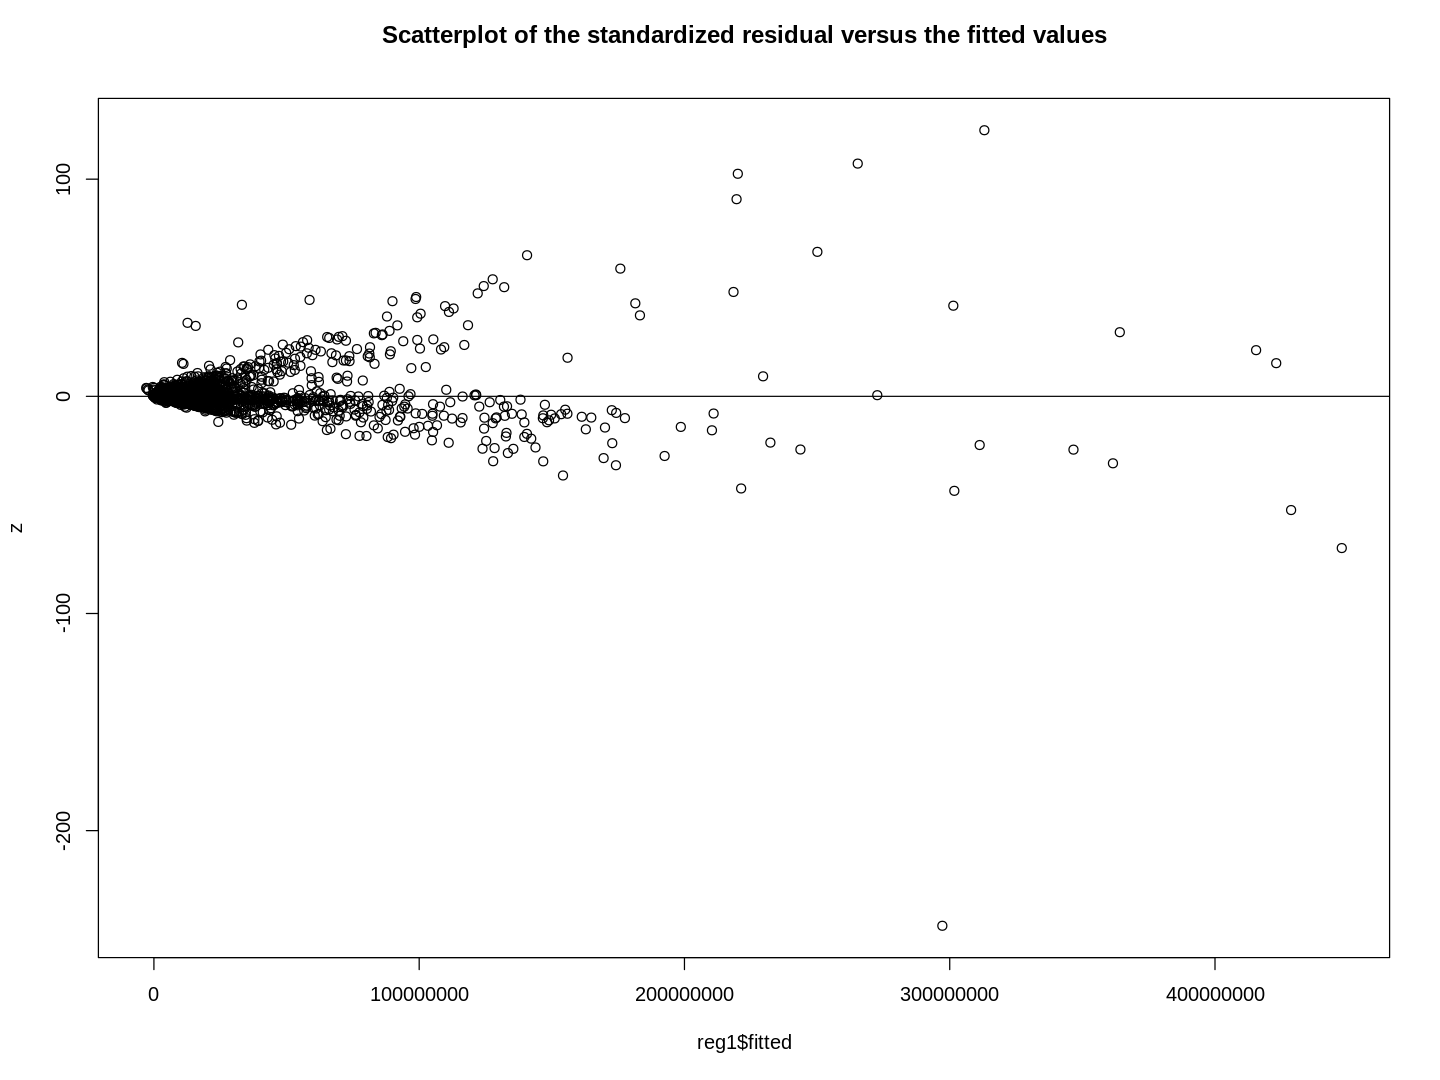

checking independent of error assumption


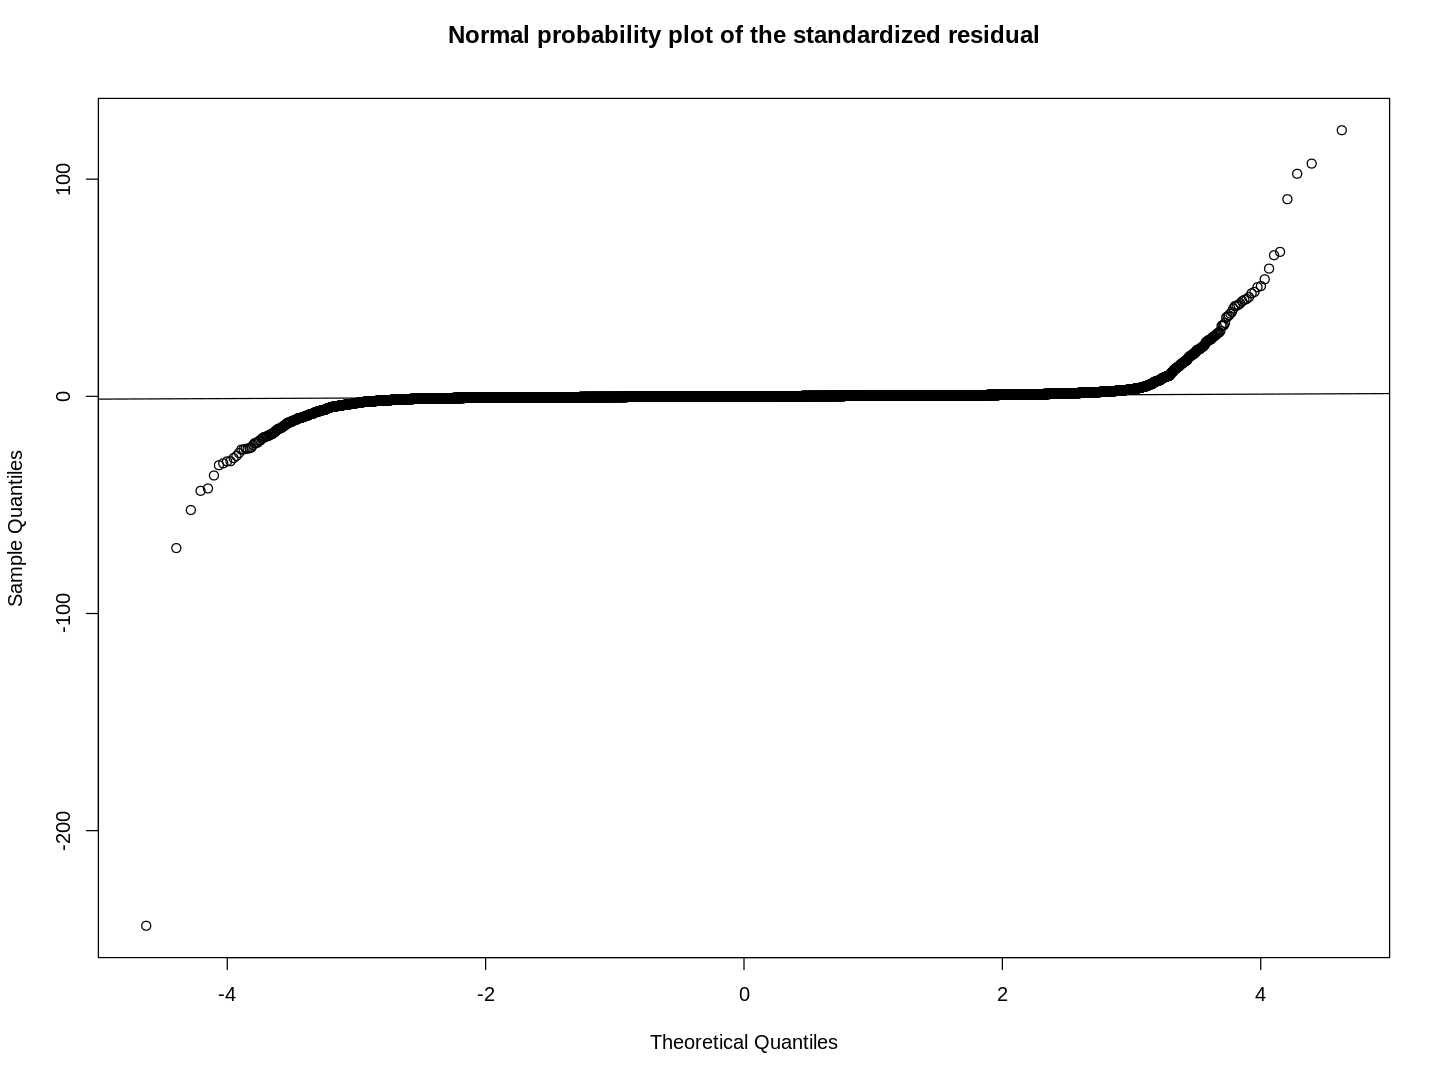

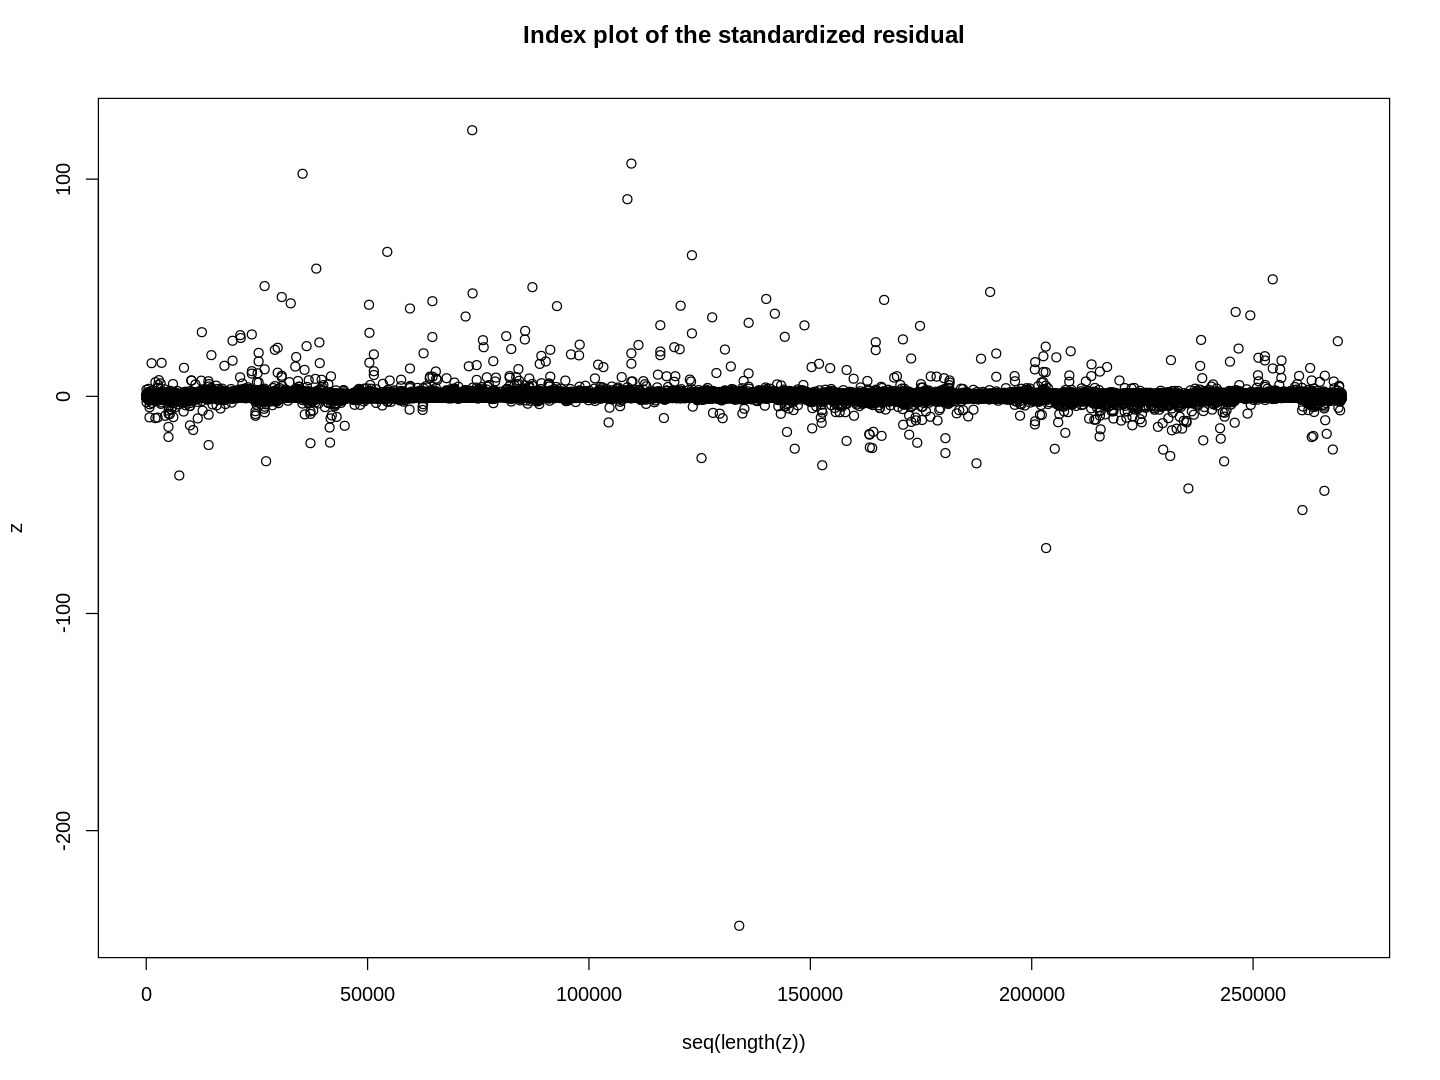

In [8]:
cat("Apply regression on picked model\n")

print(Sys.time())
reg1 <- lm(PRICE~LEGAL_TYPE+TAX_ASSESSMENT_YEAR+YEAR_BUILT+BIG_IMPROVEMENT_YEAR+TAX_LEVY+PREVIOUS_PRICE, data = data)
print(Sys.time())

#output analysis result 
# prepare data
r2 <- summary(reg1)$r.squared
r2a <- summary(reg1)$adj.r.squared
ss <- summary(reg1)$coef
ss_sig <- as.data.frame(ss[ss[,"Pr(>|t|)"]<0.05,])

cat("r2:",r2,"\n")
cat("r2a:",r2a,"\n")
cat("dim(parameters)\n")
print(dim(ss))
cat("dim(significant parameters)\n")
print(dim(ss_sig))
print(summary(reg1)) # print all significant parameters
    
#plot
cat("checking colinearity of predictors\n")
vif(reg1,type="predictor")
    
cat("checking linearity and normality assumptions by standardized residuals:\n")
#calculate standardized residuals
df <- summary(reg1)$df[2]
sigma_square <- sum(reg1$residuals**2)/df

Hat_Diag <- lm.influence(reg1)$hat
z <- reg1$residuals/(sqrt(sigma_square*(1-Hat_Diag)))
data$reg1StandardizedResiduals <- z

cat("checking normality assumption\n")
plot(z~reg1$fitted,main="Scatterplot of the standardized residual versus the fitted values\n")
abline(c(0,0))
    
cat("checking standard assumption\n")
qqnorm(z,main="Normal probability plot of the standardized residual\n")
qqline(z,pch='.')
    
cat("checking independent of error assumption\n")
plot(z~seq(length(z)),main="Index plot of the standardized residual\n")

In [9]:
#dealing with outlier
cat("searching for outliers by cooks distance\n")
p <- 9 #4 for 4 quantitative predictor, 5 for 1 qualitative 4 level predictor and 1 qualitative 3 level predictor
n <- nrow(data)

cook <- (z**2/(p+1))*(Hat_Diag/(1-Hat_Diag))
data$cook <- cook
p5F <- qf(.5,p+1,n-p-1)

#display all cook > 1. exam of each of them are required 
outliers <- data[data$cook >= p5F,]
data <- data[data$cook < p5F,-c(9,10)]
outliers

searching for outliers by cooks distance


,LEGAL_TYPE,TAX_ASSESSMENT_YEAR,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,PREVIOUS_PRICE,PRICE,reg1StandardizedResiduals,cook
,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
12567,FALSE,2018,1957,1957,1337548.0,333209000,386428000,29.529779,12.39763988
14092,FALSE,2018,1968,1988,0.0,302458000,293369500,-22.421253,1.05943085
32642,TRUE,2016,1938,1960,0.0,178601000,215356000,42.826463,7.80355517
35312,FALSE,2017,1968,1968,0.0,213225100,302458000,102.485430,10.94190126
38413,FALSE,2017,2009,2009,622.0,170242000,223170000,58.810922,2.28921439
54442,FALSE,2016,1991,1991,197.0,242652000,303476000,66.528075,6.00051476
73630,FALSE,2017,1991,1991,185.0,303476000,410985000,122.539294,32.01849135
87224,FALSE,2017,1937,1937,120.0,127698000,172568000,50.264878,0.94212767
95939,TRUE,2017,1958,1958,0.0,41090400,55453200,19.300493,1.50263512


In [10]:
# extract original data for outliers
detail_outliers <- data.frame()

for (i in seq(nrow(outliers))) {
    detail_outlier <- raw_outliers_potential[raw_outliers_potential$TAX_ASSESSMENT_YEAR == outliers[i,2] &
                        raw_outliers_potential$YEAR_BUILT == outliers[i,3] &
                        raw_outliers_potential$BIG_IMPROVEMENT_YEAR == outliers[i,4] &
                        raw_outliers_potential$TAX_LEVY == outliers[i,5] &
                        raw_outliers_potential$PREVIOUS_PRICE == outliers[i,6] &
                        raw_outliers_potential$PRICE == outliers[i,7],]
    detail_outliers <- rbind(detail_outliers,detail_outlier)
}
detail_outliers

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,LOT,PLAN,BLOCK,DISTRICT_LOT,FROM_CIVIC_NUMBER,⋯,TAX_ASSESSMENT_YEAR,NARRATIVE_LEGAL_LINE4,NARRATIVE_LEGAL_LINE5,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,PREVIOUS_PRICE,PRICE
,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
40746,010-592-695,LAND,640035960000,64003596,RS-1,,VAP7615,B,176,,⋯,2018,"STRICT LOT 176, NEW WESTMINSTER LAN","D DISTRICT, THAT PART OF BLOCK B IN",1957,1957,1337548.0,1,2018,333209000,386428000
44838,009-007-041,LAND,93722920000,9372292,RS-1,,11643,87,526,,⋯,2018,,,1968,1988,0.0,4,2018,302458000,293369500
102686,015-769-291,OTHER,27621860000,2762186,RS-1,,,,7030,,⋯,2016,,,1938,1960,0.0,1,2016,178601000,215356000
110531,009-007-041,LAND,93722920000,9372292,RS-1,,11643,87,526,,⋯,2017,,,1968,1968,0.0,4,2017,213225100,302458000
120800,007-288-212,LAND,693255550000,69325555,RS-1,,VAP17318,1,,,⋯,2017,5751 & 15816 JOHN HENDRY PARK.,,2009,2009,622.0,14,2017,170242000,223170000
169545,006-579-329,LAND,611107090000,61110709,RS-1,A,VAP20533,,185,,⋯,2016,,,1991,1991,197.0,27,2016,242652000,303476000
227625,006-579-329,LAND,611107090000,61110709,RS-1,A,VAP20533,,185,,⋯,2017,,,1991,1991,185.0,27,2017,303476000,410985000
269141,007-025-742,LAND,30630500000,3063050,RS-1,F,VAP19382,131,540,,⋯,2017,"LOT 540, NEW WESTMINSTER LAND DISTR","ICT, & BLK 132.",1937,1937,120.0,1,2017,127698000,172568000
296740,015-979-105,OTHER,630078050000,63007805,RS-1,,,182,526,,⋯,2017,,,1958,1958,0.0,2,2017,41090400,55453200


refit model after remove outliers
[1] "2022-08-08 06:45:48 UTC"
[1] "2022-08-08 06:45:48 UTC"
r2: 0.97873908 
r2a: 0.97873845 
dim(parameters)
[1] 9 4
dim(significant parameters)
[1] 9 4

Call:
lm(formula = PRICE ~ LEGAL_TYPE + TAX_ASSESSMENT_YEAR + YEAR_BUILT + 
    BIG_IMPROVEMENT_YEAR + TAX_LEVY + PREVIOUS_PRICE, data = data[, 
    -c(9, 10)])

Residuals:
      Min        1Q    Median        3Q       Max 
-28892085   -145017    -10016    121737  41316065 

Coefficients:
                                 Estimate        Std. Error   t value
(Intercept)               536573.71352167   104762.09928939    5.1218
LEGAL_TYPETRUE          -1138263.21159339   134979.53630903   -8.4329
TAX_ASSESSMENT_YEAR2017   303001.94484571     3019.27618133  100.3558
TAX_ASSESSMENT_YEAR2018  -388951.84702108     3038.86854783 -127.9923
TAX_ASSESSMENT_YEAR2019  -580691.62467668     3038.23452664 -191.1280
YEAR_BUILT                   317.33790496       50.01395569    6.3450
BIG_IMPROVEMENT_YEAR        -460

GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LEGAL_TYPE,1.0103616,1,1.0051674,--,"TAX_ASSESSMENT_YEAR, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY, PREVIOUS_PRICE"
TAX_ASSESSMENT_YEAR,1.0303607,3,1.0049973,--,"LEGAL_TYPE, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY, PREVIOUS_PRICE"
YEAR_BUILT,2.1103374,1,1.4527000,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, BIG_IMPROVEMENT_YEAR, TAX_LEVY, PREVIOUS_PRICE"
BIG_IMPROVEMENT_YEAR,2.1678151,1,1.4723502,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, YEAR_BUILT, TAX_LEVY, PREVIOUS_PRICE"
TAX_LEVY,1.1905529,1,1.0911246,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, PREVIOUS_PRICE"
PREVIOUS_PRICE,1.1847708,1,1.0884718,--,"LEGAL_TYPE, TAX_ASSESSMENT_YEAR, YEAR_BUILT, BIG_IMPROVEMENT_YEAR, TAX_LEVY"


checking linearity and normality assumptions by standardized residuals:
checking normality assumption
checking standard assumption


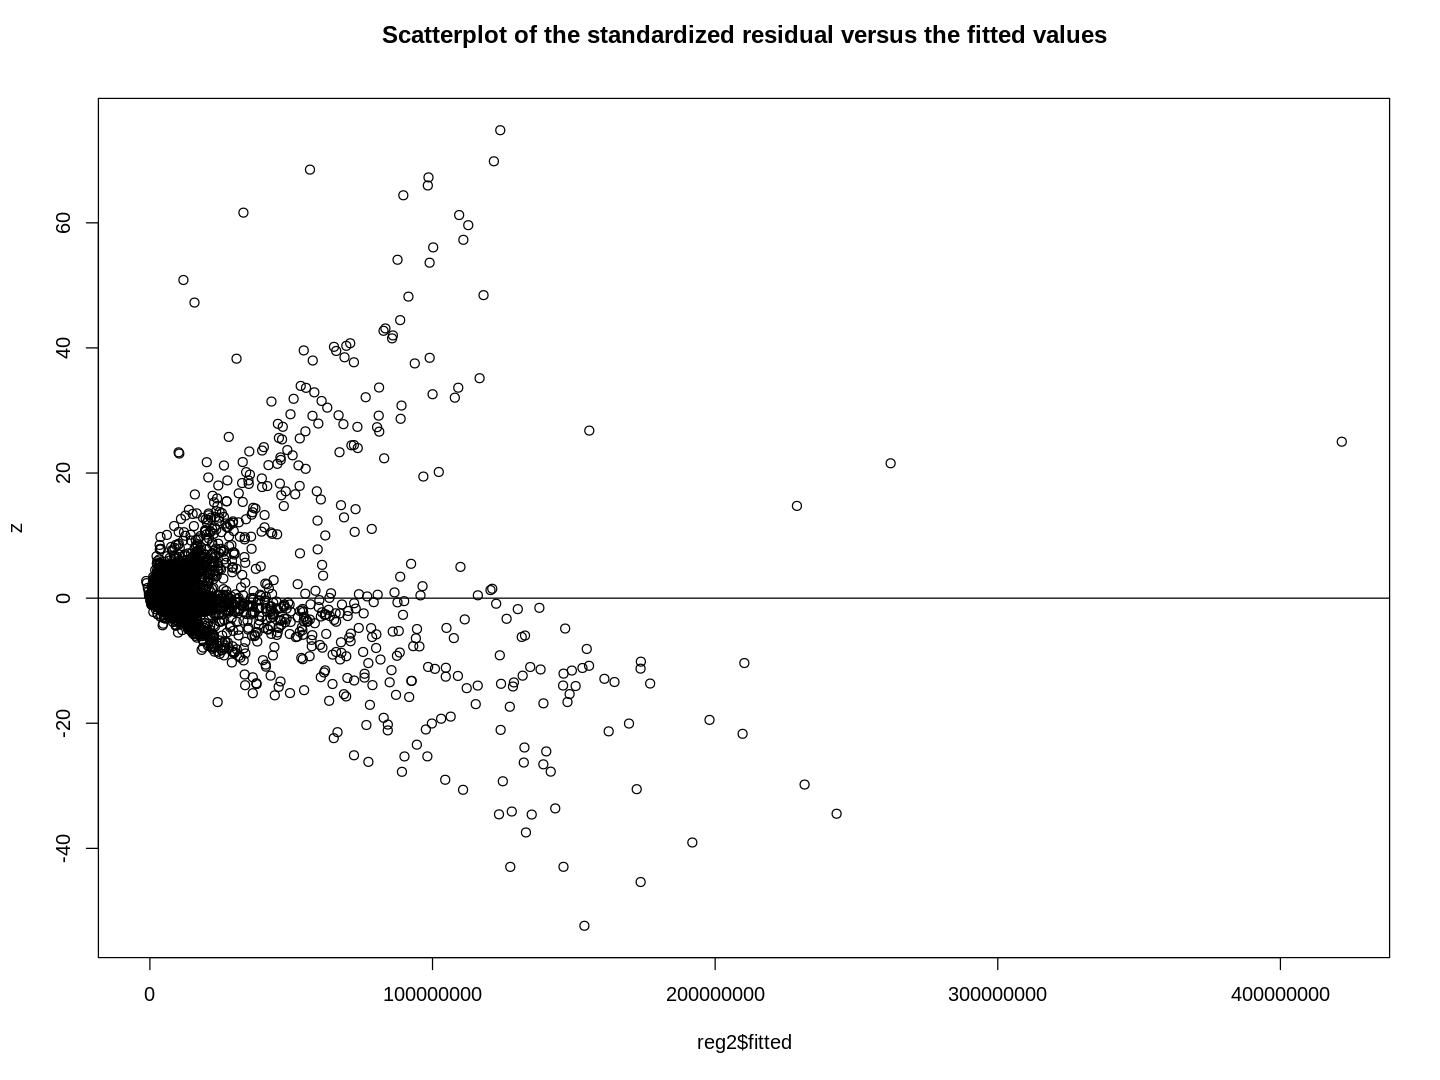

checking independent of error assumption


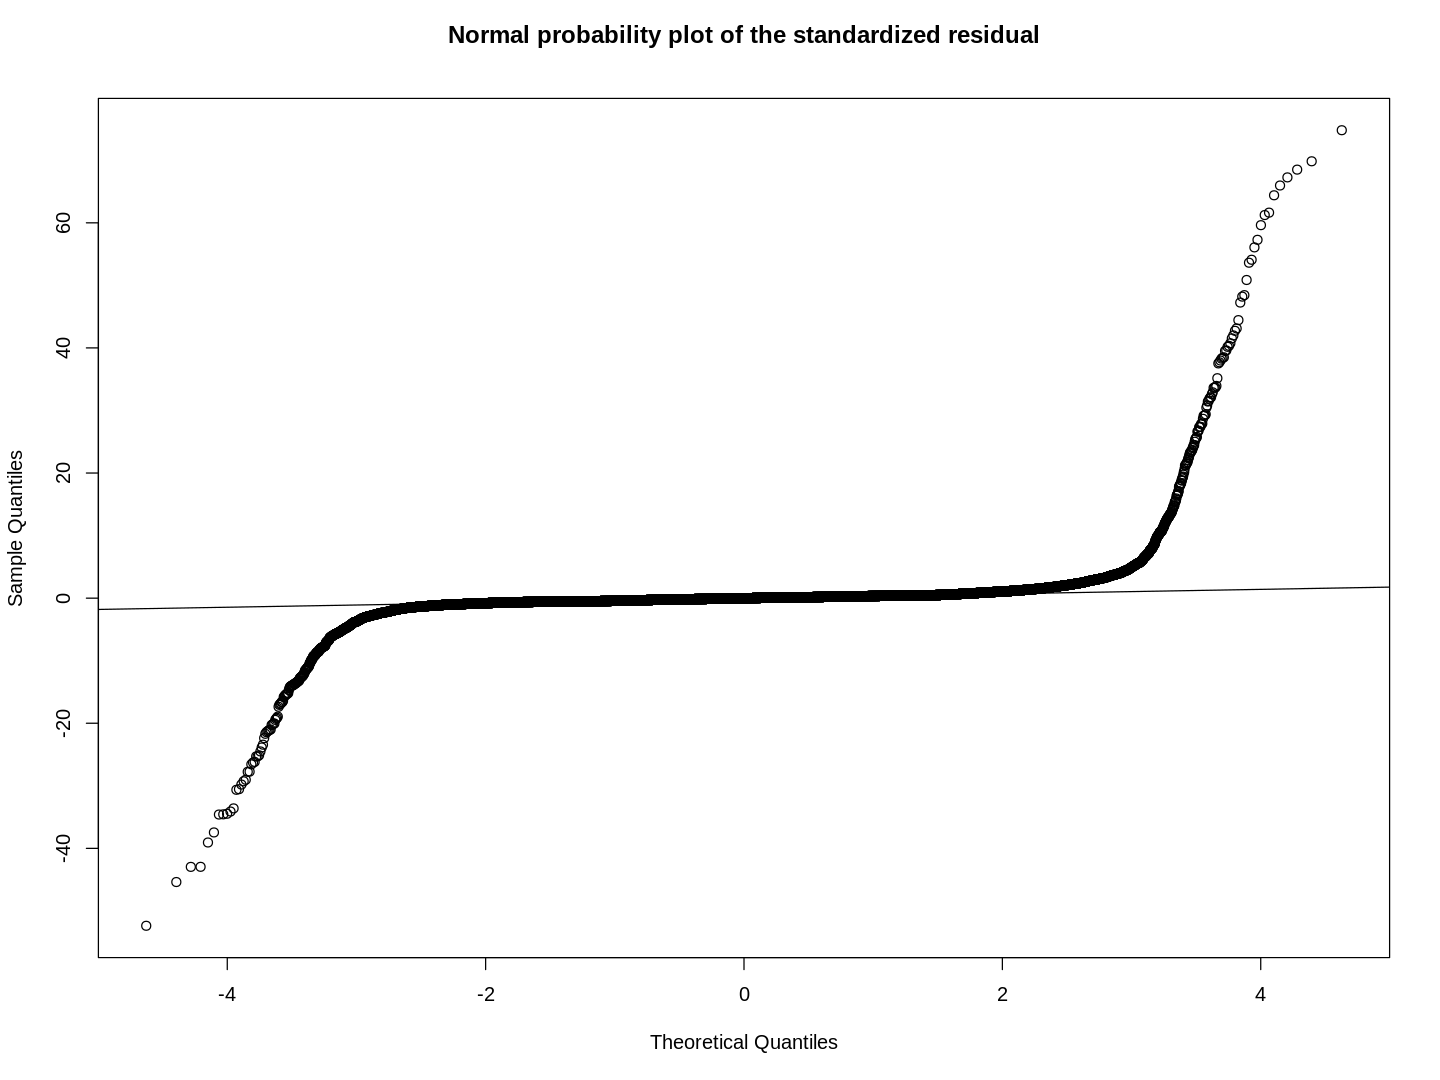

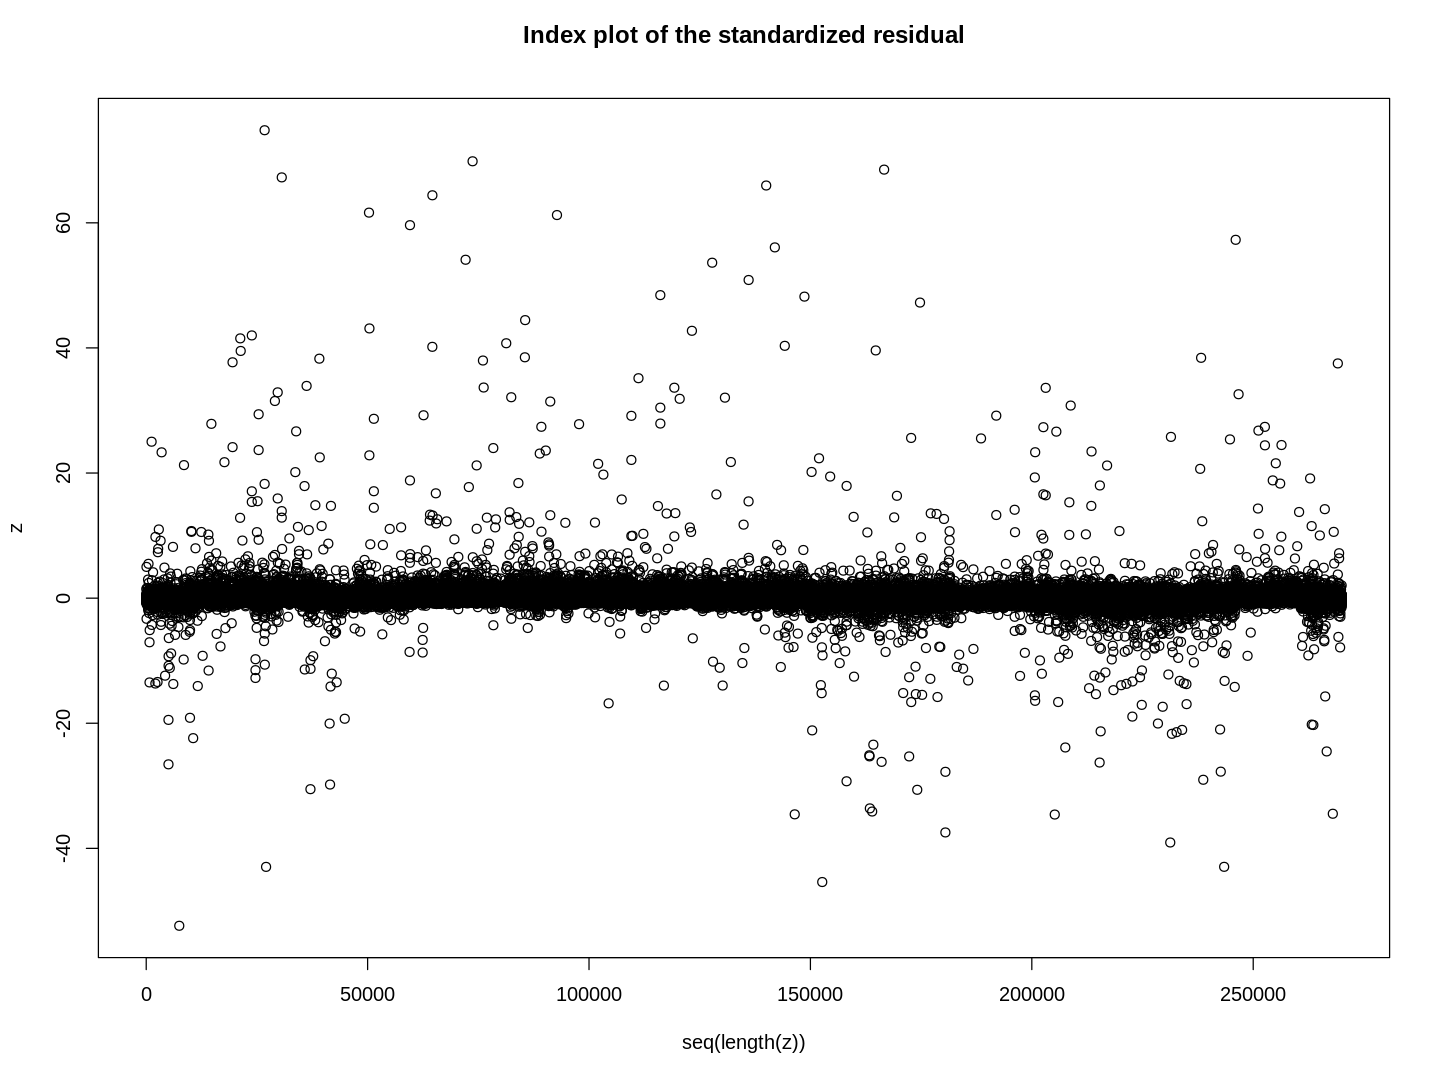

In [11]:
#refit model after remove outliers
cat("refit model after remove outliers\n")

print(Sys.time())
reg2 <- lm(PRICE~LEGAL_TYPE+TAX_ASSESSMENT_YEAR+YEAR_BUILT+BIG_IMPROVEMENT_YEAR+TAX_LEVY+PREVIOUS_PRICE, data = data[,-c(9,10)])
print(Sys.time())

#output analysis result 
# prepare data
r2 <- summary(reg2)$r.squared
r2a <- summary(reg2)$adj.r.squared
ss <- summary(reg2)$coef
ss_sig <- as.data.frame(ss[ss[,"Pr(>|t|)"]<0.05,])

cat("r2:",r2,"\n")
cat("r2a:",r2a,"\n")
cat("dim(parameters)\n")
print(dim(ss))
cat("dim(significant parameters)\n")
print(dim(ss_sig))
print(summary(reg2)) # print all significant parameters
    
#plot
cat("checking colinearity of predictors\n")
vif(reg2,type="predictor")
    
cat("checking linearity and normality assumptions by standardized residuals:\n")
#calculate standardized residuals
df <- summary(reg2)$df[2]
sigma_square <- sum(reg2$residuals**2)/df

Hat_Diag <- lm.influence(reg2)$hat
z <- reg2$residuals/(sqrt(sigma_square*(1-Hat_Diag)))
data$reg2StandardizedResiduals <- z

cat("checking normality assumption\n")
plot(z~reg2$fitted,main="Scatterplot of the standardized residual versus the fitted values\n")
abline(c(0,0))
    
cat("checking standard assumption\n")
qqnorm(z,main="Normal probability plot of the standardized residual\n")
qqline(z,pch='.')
    
cat("checking independent of error assumption\n")
plot(z~seq(length(z)),main="Index plot of the standardized residual\n")